In [1]:
#http://docs.h2o.ai/h2o/latest-stable/h2o-py/docs/modeling.html#h2odeeplearningestimator
import h2o
import pandas as pd
from h2o.estimators import H2ODeepLearningEstimator
from statistics import mean
import matplotlib.pyplot as plt
import time
import numpy as np
import scipy.stats as st

h2o.init()
irisData = h2o.import_file("/Users/sukhwindersingh/Documents/study/sem2/PDC/iris/iris.data");
votesData = h2o.import_file("/Users/sukhwindersingh/Documents/study/sem2/PDC/votes/house-votes-84.data");
sonarData = h2o.import_file("/Users/sukhwindersingh/Documents/study/sem2/PDC/sonar/sonar.all-data");


Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: java version "1.8.0_261"; Java(TM) SE Runtime Environment (build 1.8.0_261-b12); Java HotSpot(TM) 64-Bit Server VM (build 25.261-b12, mixed mode)
  Starting server from /Users/sukhwindersingh/Library/Python/3.8/lib/python/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /var/folders/ds/ysb5ypvx45g_zr0sp0kp797c0000gn/T/tmpq195qx_b
  JVM stdout: /var/folders/ds/ysb5ypvx45g_zr0sp0kp797c0000gn/T/tmpq195qx_b/h2o_sukhwindersingh_started_from_python.out
  JVM stderr: /var/folders/ds/ysb5ypvx45g_zr0sp0kp797c0000gn/T/tmpq195qx_b/h2o_sukhwindersingh_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,02 secs
H2O_cluster_timezone:,Europe/Warsaw
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.32.1.1
H2O_cluster_version_age:,2 months and 23 days
H2O_cluster_name:,H2O_from_python_sukhwindersingh_b338w5
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.556 Gb
H2O_cluster_total_cores:,12
H2O_cluster_allowed_cores:,12
H2O_cluster_status:,"accepting new members, healthy"


Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%


deeplearning Model Build progress: |██████████████████████████████████████| 100%
deeplearning Model Build progress: |██████████████████████████████████████| 100%
deeplearning Model Build progress: |██████████████████████████████████████| 100%
deeplearning Model Build progress: |██████████████████████████████████████| 100%
deeplearning Model Build progress: |██████████████████████████████████████| 100%
deeplearning Model Build progress: |██████████████████████████████████████| 100%
deeplearning Model Build progress: |██████████████████████████████████████| 100%
deeplearning Model Build progress: |██████████████████████████████████████| 100%
deeplearning Model Build progress: |██████████████████████████████████████| 100%
deeplearning Model Build progress: |██████████████████████████████████████| 100%
deeplearning Model Build progress: |██████████████████████████████████████| 100%
deeplearning Model Build progress: |██████████████████████████████████████| 100%
deeplearning Model Build pro

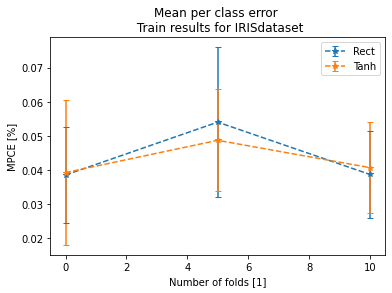

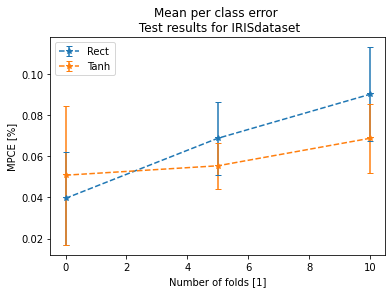

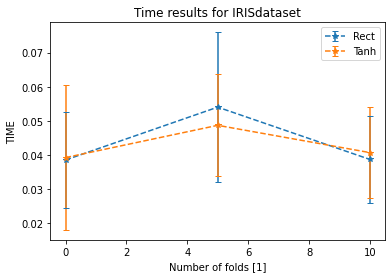

deeplearning Model Build progress: |██████████████████████████████████████| 100%
deeplearning Model Build progress: |██████████████████████████████████████| 100%
deeplearning Model Build progress: |██████████████████████████████████████| 100%
deeplearning Model Build progress: |██████████████████████████████████████| 100%
deeplearning Model Build progress: |██████████████████████████████████████| 100%
deeplearning Model Build progress: |██████████████████████████████████████| 100%
deeplearning Model Build progress: |██████████████████████████████████████| 100%
deeplearning Model Build progress: |██████████████████████████████████████| 100%
deeplearning Model Build progress: |██████████████████████████████████████| 100%
deeplearning Model Build progress: |██████████████████████████████████████| 100%
deeplearning Model Build progress: |██████████████████████████████████████| 100%
deeplearning Model Build progress: |██████████████████████████████████████| 100%
deeplearning Model Build pro

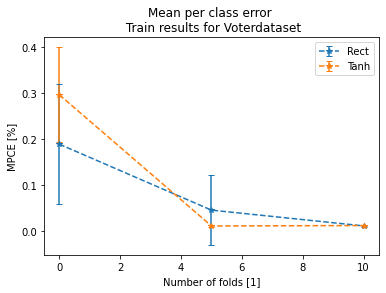

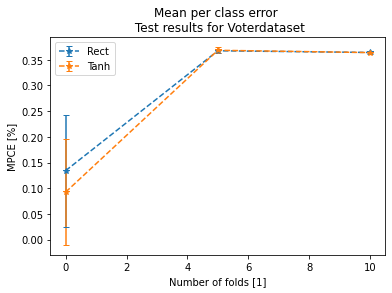

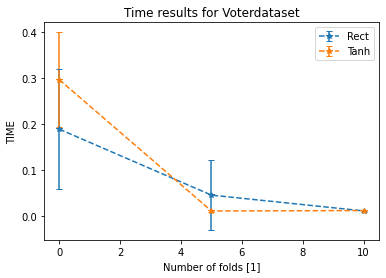

deeplearning Model Build progress: |██████████████████████████████████████| 100%
deeplearning Model Build progress: |██████████████████████████████████████| 100%
deeplearning Model Build progress: |██████████████████████████████████████| 100%
deeplearning Model Build progress: |██████████████████████████████████████| 100%
deeplearning Model Build progress: |██████████████████████████████████████| 100%
deeplearning Model Build progress: |██████████████████████████████████████| 100%
deeplearning Model Build progress: |██████████████████████████████████████| 100%
deeplearning Model Build progress: |██████████████████████████████████████| 100%
deeplearning Model Build progress: |██████████████████████████████████████| 100%
deeplearning Model Build progress: |██████████████████████████████████████| 100%
deeplearning Model Build progress: |██████████████████████████████████████| 100%
deeplearning Model Build progress: |██████████████████████████████████████| 100%
deeplearning Model Build pro

In [ ]:
def calculate_confidenceInterval(ds,confidence):
    n = len(ds)
    m = np.mean(ds)
    std_err = st.sem(ds)
    std_dev= np.std(ds)
    moe = std_err * st.t.ppf((1 + confidence) / 2., n - 1) #marginOfError
    return m,moe;

def plotGivenData(m,t,y):
    fig1, ax1 = plt.subplots()
    ax1.set_title(t)
    ax1.set_ylabel(y)
    ax1.set_xlabel('Method_folds[1]')
    ax1.boxplot(m.values(),labels=m.keys())

def drawPlot(folds,r_m,r_e,t_m,t_e,label,title):
    plt.errorbar(folds,r_m,yerr=r_e,label="Rect",fmt='*',capsize=3,ls='--')
    plt.errorbar(folds,t_m,yerr=t_e,label="Tanh",fmt='*',capsize=3,ls='--')
    plt.title(title)
    plt.xlabel("Number of folds [1]")
    plt.ylabel(label)
    plt.legend()
    plt.show()
    
def calculateMPCE(dataSet,predictorColumns,responseColumn,dataSetName):
    map_train_error={}
    map_test_error={}
    map_time={}
    activations =["rectifier", "tanh"]
    folds = [0,5,10]
    for activation in activations:    
        for fold in folds:
            string_model = activation  +"_"+  str(fold)
            map_train_error[string_model]=[];
            map_test_error[string_model]=[];
            map_time[string_model]=[];
            for i in range(0,10):      
                dl = H2ODeepLearningEstimator(hidden=[5,20,100],
                                           epochs=50,
                                           activation=activation,
                                           nfolds=fold)
                if fold == 0:
                    trainData, testData = dataSet.split_frame(ratios=[.8])
                    t0 = time.time()
                    dl.train(x=predictorColumns,
                              y=responseColumn,
                              training_frame=trainData,
                              validation_frame=testData)
                    t0 = time.time() - t0
                    if(dataSetName=='Sonar'):
                        map_test_error[string_model].append(dl.mean_per_class_error(valid=True)[0][1])
                    else:
                        map_test_error[string_model].append(dl.mean_per_class_error(valid=True))
                else:
                    t0 = time.time()
                    dl.train(x=predictorColumns,
                         y=responseColumn,
                         training_frame=dataSet)
                    t0 = time.time() - t0
                    if(dataSetName=='Sonar'):
                        map_test_error[string_model].append(dl.mean_per_class_error(train=True)[0][1])
                    else:    
                        map_test_error[string_model].append(dl.mean_per_class_error(xval=True))
                if(dataSetName=='Sonar'):
                    map_train_error[string_model].append(dl.mean_per_class_error(train=True)[0][1])
                else:    
                    map_train_error[string_model].append(dl.mean_per_class_error(train=True))
                map_time[string_model].append(t0)
    rect_test_m = []
    rect_test_e = []
    tanh_test_m = []
    tanh_test_e = []
    for k, v in map_test_error.items():
        if(k.startswith('r')):
            m,i=calculate_confidenceInterval(v,0.95)
            rect_test_m.append(m)
            rect_test_e.append(i)
        else:
            m,i=calculate_confidenceInterval(v,0.95)
            tanh_test_m.append(m)
            tanh_test_e.append(i)
    rect_train_m = []
    rect_train_e = []
    tanh_train_m = []
    tanh_train_e = []
    for k, v in map_train_error.items():
        if(k.startswith('r')):
            m,i=calculate_confidenceInterval(v,0.95)
            rect_train_m.append(m)
            rect_train_e.append(i)
        else:
            m,i=calculate_confidenceInterval(v,0.95)
            tanh_train_m.append(m)
            tanh_train_e.append(i)
    
    rect_time_m = []
    rect_time_e = []
    tanh_time_m = []
    tanh_time_e = []       
    for k, v in map_train_error.items():
        if(k.startswith('r')):
            m,i=calculate_confidenceInterval(v,0.95)
            rect_time_m.append(m)
            rect_time_e.append(i)
        else:
            m,i=calculate_confidenceInterval(v,0.95)
            tanh_time_m.append(m)
            tanh_time_e.append(i)
    drawPlot(folds,rect_train_m,rect_train_e,tanh_train_m,tanh_train_e,"MPCE [%]",'Mean per class error \n Train results for ' + dataSetName + 'dataset')
    drawPlot(folds,rect_test_m,rect_test_e,tanh_test_m,tanh_test_e,"MPCE [%]",'Mean per class error \n Test results for ' + dataSetName + 'dataset')
    drawPlot(folds,rect_time_m,rect_time_e,tanh_time_m,tanh_time_e,"TIME",'Time results for ' + dataSetName + 'dataset')
    
    
    
calculateMPCE(irisData,irisData.col_names[0:4],irisData.col_names[4],'IRIS')
calculateMPCE(votesData,votesData.col_names[1:16],votesData.columns[0],'Voter')
calculateMPCE(sonarData,sonarData.col_names[0:60],sonarData.col_names[60],'Sonar')

